# Plot Training Logs : DQN_CarRacing 🏎️🏁🏆

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

**Note** : Some of them will be labeled "continuous", they use the continuous model.

In [13]:
files = glob.glob('../models/DQN_CarRacing*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\DQN Carracing 24-08-02 15-59 log.csv
 1 | ../models\DQN Carracing 24-08-09 13-33 log.csv


In [14]:
choice = 0 # Make your choice here

##### Printing the hyperparameters

In [15]:
continuous = False
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:>30s} : {val}')

if 'continuous' in files[choice].lower():
    continuous = True

print(f'{"CONTINUOUS":>30s} : {continuous}')

Hyperparameters 
----------------------------------------
                  NUM_EPISODES : 1000
                        N_IMGS : 3
                        N_IDLE : 2
                  N_START_SKIP : 20
                         GAMMA : 0.95
                     N_FILTERS : 16
                  DROPOUT_RATE : 0
                 DQN_EPS_START : 1
                   DQN_EPS_END : 0.05
                 DQN_EPS_DECAY : 50000
                  DQN_MEM_SIZE : 20000
            DQN_MEM_BATCH_SIZE : 32
  DQN_NETWORK_REFRESH_STRATEGY : soft
                       DQN_TAU : 0.01
                        DQN_LR : 0.001
                        DQN_L2 : 0
          DQN_SCHEDULER_FACTOR : 0.5
        DQN_SCHEDULER_PATIENCE : 150
          DQN_SCHEDULER_MIN_LR : 1e-05
                    CONTINUOUS : False


##### Plotting the data

In [16]:
df = pd.read_csv(files[choice])

In [17]:
df

,episode,step,time,cum_reward,loss,epsilon,action_0,action_1,action_2,action_3,action_4,learning_rate
0,0,980,15.906694,-50.380952,0.019672,0.981599,0.197959,0.195918,0.187755,0.204082,0.214286,0.001000
1,1,980,32.362926,-39.780822,0.027713,0.963517,0.183673,0.193878,0.228571,0.202041,0.191837,0.001000
2,2,980,49.326808,-22.657534,0.037816,0.945786,0.185714,0.204082,0.242857,0.202041,0.165306,0.001000
3,3,980,68.614510,-51.736655,0.039503,0.928400,0.171429,0.179592,0.263265,0.200000,0.185714,0.001000
4,4,980,87.738647,-68.588235,0.036027,0.911351,0.157143,0.163265,0.263265,0.216327,0.200000,0.001000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,980,18713.922525,836.707904,0.276504,0.050000,0.028571,0.048980,0.140816,0.765306,0.016327,0.000125
996,996,980,18733.501268,610.092486,0.278593,0.050000,0.089796,0.136735,0.155102,0.604082,0.014286,0.000125
997,997,980,18751.944043,662.299625,0.270992,0.050000,0.116327,0.155102,0.085714,0.628571,0.014286,0.000125
998,998,980,18771.222588,729.814570,0.266342,0.050000,0.034694,0.140816,0.202041,0.614286,0.008163,0.000125


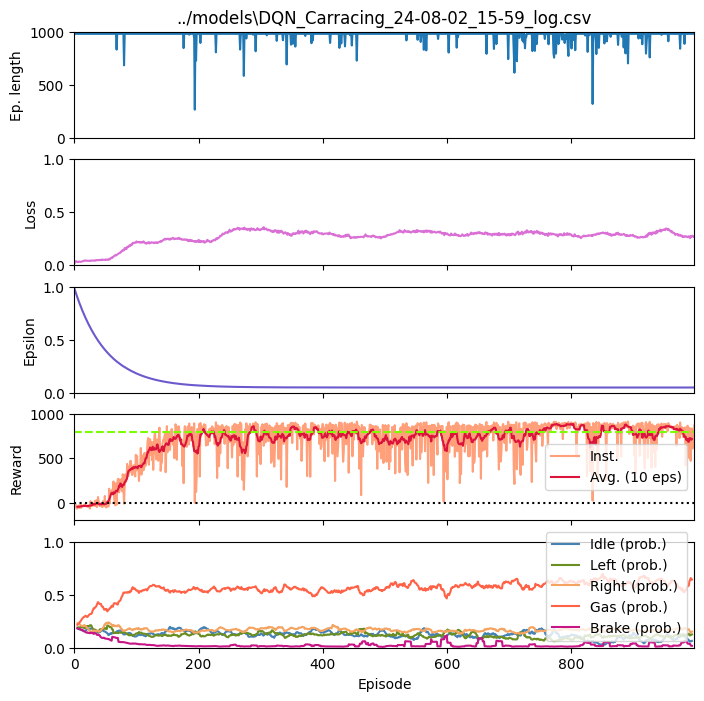

In [18]:
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['loss'], color='orchid')
axes[2].plot(df['episode'], df['epsilon'], color='slateblue')
axes[3].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[3].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')

if continuous: 
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Main Engine (avg)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='tomato', label='Side Engine (avg)')
    axes[4].set_ylim([-2,2])
else:
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Idle (prob.)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='olivedrab', label='Left (prob.)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='sandybrown', label='Right (prob.)')
    axes[4].plot(df['episode'], df['action_3'].rolling(10, center=True).mean(), color='tomato', label='Gas (prob.)')
    axes[4].plot(df['episode'], df['action_4'].rolling(10, center=True).mean(), color='mediumvioletred', label='Brake (prob.)')
    axes[4].set_ylim([0,1])

# Formatting
axes[3].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], 800 * np.ones_like(df['cum_reward']), '--', color='lawngreen')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Loss')
axes[2].set_ylabel('Epsilon')
axes[3].set_ylabel('Reward')
axes[3].legend()
axes[4].legend()

axes[0].set_ylim([0, 1000])
axes[1].set_ylim([0,1])
axes[2].set_ylim([0,1])
axes[3].set_ylim([-200,1000])

axes[0].set_title(files[choice])
axes[4].set_xlim([0, df['episode'].max()])
axes[4].set_xlabel('Episode')


fig.savefig(files[choice].replace('log.csv','fig.png'))